<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/Covid_Daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Covid-19 Analysis**

### **What is Covid-19?**
**Covid-19** is the name of an **infectious disease caused** by a new **Coronavirus (SARS-CoV-2)**, which was never identified in humans before. The disease can cause flu symptoms like cough, fever, and in most accute cases, **pneumonia**.  

The **Coronavirus family** is responsible for diseases ranging from **mild cold** to severe acute respiratory syndrome **(SARS)** and Middle East respiratory syndrome **(MERS)**, which had **outbreaks respectively in 2002 and 2012**. The name is due to the virus crown shape. They attack animals, but some can be **transmitted from animals to humans**. This is the seventh Coronavirus known to affect humans.

The virus has been **spreading quickly worldwide**, and the **contagion** occurs by the contact with contamined fluids, mainly through respiratory droplets, but also through the contact with contamined surfaces, as the virus can live up to 3 days in some types of surfaces.

###**What is the origin of this Coronavirus?**
China first reported different cases of pneumonia to WHO on December 31st, 2019, linked to a seafood market in the city of Wuhan, where exotic wild animals were sold ilegally. Since December 2019, the virus has spread across the continents, increasing dramatically the number of infected people and of deaths.

###**What will we do in this notebook?**
This notebook was built to follow up the evolution of Covid-19. To achieve this, we will work with a daily updated data file with cases and deaths of Covid-19 divided by countries. The file has to be prepared in order to be manipulated using `pandas` and `matplotlib` libraries. We want to show the dynamic of the outbreak for the **selected countries and worldwide**, depicting the evolution of **daily and total cases** and **identifying the most affected countries**, as well as **calculate the rate of mortality**.

In the future, new variables, calculations and graphs are to be added. 

## **Data Gathering**
The original database is in `.csv` format and was obtained from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide), which releases daily updates. To make it easier to update, the file is stored at [GitHub](https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/covid_19.csv).

### **Observation:** 
**Chinese cases** presented a steep **elevation** on **February 13th 2020**, which is a result from a **change in methodology**. In order to speed up the results, **image diagnostics**, which are ready faster, began to be accepted from this date on, being included at once at the series on this date. 

## **Importing libraries and data**

In [0]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
plt.style.use('seaborn')


In [0]:
# importing the .csv file
path = "https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/covid_19.csv"
df = pd.read_csv(path, parse_dates=True)

In [131]:
# checking the first 5 entries
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
1,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
3,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
4,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0


## **Preparing the database**

We need to:
- **check** if all the numerical variables are `int64`or `float`
- **adjust the date** for `datetime` format and assign it to the **index**
- **remove the columns** we don´t need
- **rename** the columns for shorter names

In [161]:
# check variables types
display(df.dtypes)


cases          int64
deaths         int64
countries     object
ID            object
code          object
pop2018      float64
dtype: object

<Figure size 576x396 with 0 Axes>

All numerical variables are `int64` and `float64`, so they are ready to be used.

In [0]:
# change dateRep to datetime format and assign it to index
df.index = pd.to_datetime(df.dateRep, format="%d/%m/%Y")

# drop dateRep column
df.drop(['dateRep', 'day', 'month', 'year'], axis=1, inplace=True)

# rename columns
df = df.rename(columns = {'countriesAndTerritories':'countries', 'geoId':'ID', 
                          'countryterritoryCode':'code', 'popData2018':'pop2018'})
df.index.names = ['date']


In [134]:
# check again the first entries
df.head()

,cases,deaths,countries,ID,code,pop2018
date,,,,,,
2020-04-01,25,0,Afghanistan,AF,AFG,37172386.0
2020-03-31,27,0,Afghanistan,AF,AFG,37172386.0
2020-03-30,8,1,Afghanistan,AF,AFG,37172386.0
2020-03-29,15,1,Afghanistan,AF,AFG,37172386.0
2020-03-28,16,1,Afghanistan,AF,AFG,37172386.0


All the changes were processed, so we can proceed to **separate countries to columns** to **visualize it better**.

### **What are the variables we are going to use?**

For now, we are going to work with:
- `cases`: daily cases by country
- `deaths`: daily number of deaths by country
- `date`: the time series begins at December 31st, 2019. 


### **Which are the affected countries?**

In [135]:
# countries list
df.countries.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Algeria',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia',

## ***Covid-19: Cases***
## Daily Cases by Country - Dataframe

Now we need to **transfer the countries to columns**. Remember that they are all in a single column!

There are several methods to do this, but we will use here a very used Excel tool: **pivot tables! Yes, you can use it in Python too!**


In [136]:
# creating a pivot table to separate daily cases by country
pv_cases = pd.pivot_table(df, values=['cases'], index='date', columns='countries' )
pv_cases.tail()

cases                  ...                        
countries  Afghanistan Albania Algeria  ... Vietnam Zambia Zimbabwe
date                                    ...                        
2020-03-28        16.0    12.0     0.0  ...    16.0    2.0      2.0
2020-03-29        15.0    11.0   104.0  ...    54.0   12.0      2.0
2020-03-30         8.0    15.0    45.0  ...     5.0    1.0      0.0
2020-03-31        27.0    11.0    57.0  ...     1.0    6.0      0.0
2020-04-01        25.0    20.0    73.0  ...     0.0    0.0      1.0

[5 rows x 202 columns]

### Converting pivot table to dataframe

Now:

See that there is a word `cases` at the top of the resulting dataframe?

- if we continue to work with the **pivot table** like this, other commands, as `.loc`, will **not recognize correctly the countries' columns**, as they can only read `cases` as columns.
- to **return to dataframe shape - remove `cases`**, we use:
    - `droplevel()`
    - `df.columns.name=None`. 

In [137]:
# removing 'cases' and 'countries' columns names
pv_cases.columns = pv_cases.columns.droplevel(0)
pv_cases.columns.name = None
pv_cases.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,...,Senegal,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-28,16.0,12.0,0.0,43.0,1.0,0.0,0.0,101.0,43.0,0.0,212.0,668.0,43.0,0.0,8.0,0.0,0.0,8.0,1049.0,0.0,0.0,2.0,0.0,13.0,48.0,NaN,502.0,0.0,1.0,29.0,0.0,NaN,4.0,0.0,671.0,0.0,NaN,2.0,0.0,0.0,...,14.0,73.0,0.0,NaN,138.0,1.0,69.0,55.0,1.0,243.0,146.0,NaN,7871.0,0.0,0.0,0.0,240.0,1390.0,0.0,15.0,0.0,0.0,1.0,1.0,54.0,2069.0,0.0,0.0,62.0,72.0,2885.0,0.0,2.0,18695.0,0.0,21.0,12.0,16.0,2.0,2.0
2020-03-29,15.0,11.0,104.0,41.0,0.0,0.0,0.0,55.0,52.0,0.0,431.0,594.0,17.0,2.0,7.0,0.0,2.0,0.0,1850.0,0.0,0.0,5.0,1.0,7.0,28.0,NaN,487.0,0.0,5.0,38.0,34.0,NaN,1.0,11.0,697.0,0.0,NaN,0.0,1.0,0.0,...,11.0,202.0,0.0,NaN,71.0,0.0,0.0,59.0,0.0,17.0,105.0,NaN,8189.0,9.0,2.0,0.0,401.0,1048.0,0.0,16.0,109.0,0.0,3.0,8.0,0.0,1704.0,3.0,16.0,93.0,63.0,2546.0,0.0,3.0,19979.0,66.0,29.0,0.0,54.0,12.0,2.0
2020-03-30,8.0,15.0,45.0,26.0,3.0,0.0,0.0,75.0,0.0,22.0,284.0,522.0,27.0,3.0,27.0,1.0,7.0,0.0,1702.0,0.0,0.0,0.0,0.0,15.0,66.0,NaN,352.0,0.0,6.0,15.0,0.0,NaN,4.0,0.0,869.0,0.0,NaN,0.0,0.0,0.0,...,12.0,82.0,1.0,NaN,41.0,0.0,41.0,39.0,0.0,93.0,78.0,NaN,6549.0,5.0,0.0,0.0,253.0,1122.0,4.0,23.0,143.0,0.0,2.0,4.0,51.0,1815.0,0.0,3.0,107.0,0.0,2433.0,1.0,8.0,18360.0,5.0,12.0,0.0,5.0,1.0,0.0
2020-03-31,27.0,11.0,57.0,36.0,0.0,0.0,0.0,146.0,58.0,NaN,464.0,805.0,64.0,0.0,15.0,0.0,1.0,11.0,1063.0,1.0,0.0,5.0,0.0,11.0,30.0,NaN,323.0,1.0,1.0,13.0,42.0,NaN,2.0,43.0,1169.0,0.0,NaN,4.0,0.0,2.0,...,20.0,0.0,2.0,NaN,0.0,NaN,0.0,33.0,0.0,46.0,125.0,1.0,6398.0,0.0,1.0,0.0,328.0,1138.0,1.0,0.0,263.0,0.0,4.0,7.0,34.0,2318.0,0.0,0.0,62.0,143.0,2619.0,5.0,NaN,21595.0,11.0,4.0,16.0,1.0,6.0,0.0
2020-04-01,25.0,20.0,73.0,6.0,0.0,0.0,0.0,0.0,50.0,5.0,150.0,564.0,25.0,1.0,52.0,2.0,0.0,47.0,876.0,0.0,2.0,5.0,0.0,8.0,60.0,3.0,1138.0,0.0,2.0,40.0,24.0,2.0,0.0,51.0,1112.0,1.0,NaN,2.0,0.0,0.0,...,13.0,159.0,0.0,1.0,35.0,3.0,27.0,51.0,0.0,27.0,0.0,NaN,9222.0,2.0,1.0,2.0,407.0,696.0,0.0,16.0,0.0,0.0,0.0,2.0,50.0,3887.0,0.0,11.0,69.0,53.0,3009.0,0.0,0.0,24998.0,18.0,24.0,0.0,0.0,0.0,1.0


## Daily New Cases by Selected Countries - Chart 

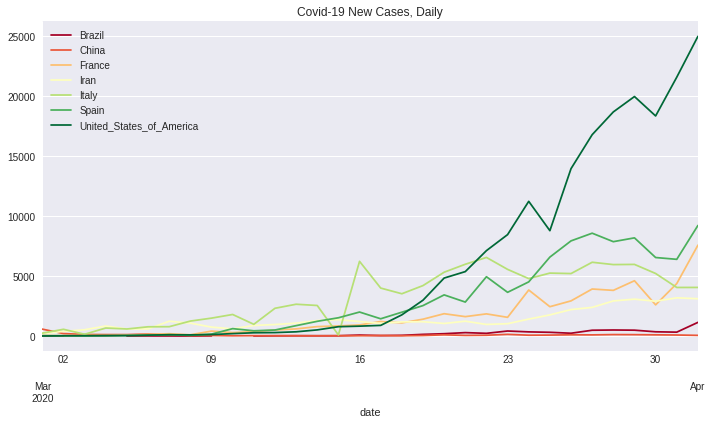

In [138]:
# plotting new cases

fig, ax = plt.subplots(figsize=(10,6))

pv_cases.loc['2020-03-01': ,['Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(kind='line', cmap='RdYlGn', ax=ax)

ax.set_title('Covid-19 New Cases, Daily')

plt.savefig('new_cases_country.jpg')
files.download('new_cases_country.jpg')


plt.tight_layout();

From this graph, we can notice that **daily new cases increased sharply from mid-March on, mainly in the United States, and in Italy, they began to stabilize and even fall on the March 23rd-30th week**. 
**France and Spain cases spiked again** at the beginning of April, and **Brazilian cases just presented a steep increase**.

## Daily New Cases Worldwide - Dataframe
We have daily cases for each country, but the database didn´t bring a column with **total values**, so we are going to sum the countries cases by using `.iloc` and `df.sum` to create a **Worldwide** column: 

In [139]:
pv_cases['Worldwide'] = pv_cases.iloc[:,:].sum(axis=1)
display(pv_cases['Worldwide'])

date
2019-12-31       27.0
2020-01-01        0.0
2020-01-02        0.0
2020-01-03       17.0
2020-01-04        0.0
               ...   
2020-03-28    63937.0
2020-03-29    65162.0
2020-03-30    58487.0
2020-03-31    62444.0
2020-04-01    75403.0
Name: Worldwide, Length: 93, dtype: float64

As we can see, **as of Apr 1st, 75.403 new cases were confirmed worldwide**. Now, let´s check this evolution on a graph:

## Daily New Cases Worldwide - Chart

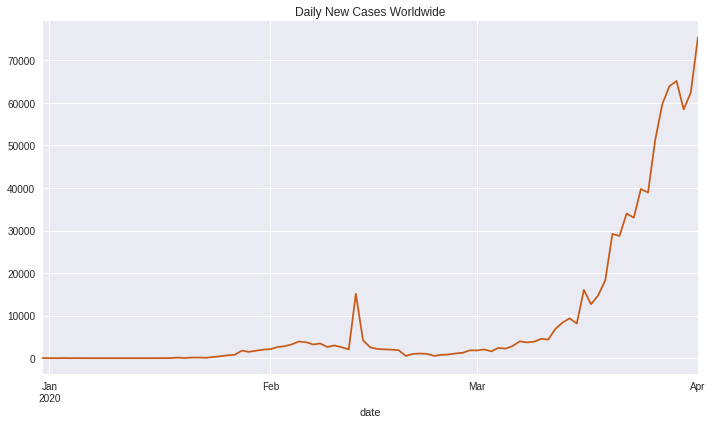

In [140]:
fig, ax = plt.subplots(figsize=(10,6))

pv_cases.Worldwide.plot(ax=ax, color='#C85A17')

ax.set_title('Daily New Cases Worldwide')

plt.savefig('new_total_cases.jpg')
files.download('new_total_cases.jpg')

plt.tight_layout()

Remember that the **peak observed on Feb 13th** is due to a **change in methodology of confirmed cases in China**, which added **more than 15 thousand confirmed cases** by image from the beginning of the outbreak until that date!

## Total Cases Worldwide
We checked the daily new cases, but now we want to see the evolution of **accumulated cases** for all the countries and worldwide. For this, we will use the `df.cumsum()` method:

In [141]:
# cumulative sum of the cases along the time
pv_cases_sum = pv_cases.cumsum(skipna=True)
pv_cases_sum.tail()


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,...,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Worldwide
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-28,91.0,186.0,305.0,267.0,4.0,2.0,7.0,690.0,372.0,28.0,3378.0,7697.0,165.0,9.0,466.0,48.0,24.0,94.0,7284.0,2.0,6.0,17.0,3.0,74.0,229.0,NaN,3417.0,2.0,115.0,293.0,146.0,NaN,102.0,88.0,4689.0,5.0,NaN,8.0,5.0,5.0,...,457.0,7.0,NaN,732.0,3.0,295.0,632.0,3.0,1170.0,9478.0,NaN,64059.0,106.0,3.0,8.0,3046.0,12104.0,5.0,267.0,1136.0,1.0,25.0,66.0,227.0,5698.0,2.0,14.0,218.0,405.0,14543.0,13.0,19.0,104686.0,238.0,104.0,119.0,169.0,16.0,5.0,591704.0
2020-03-29,106.0,197.0,409.0,308.0,4.0,2.0,7.0,745.0,424.0,28.0,3809.0,8291.0,182.0,11.0,473.0,48.0,26.0,94.0,9134.0,2.0,6.0,22.0,4.0,81.0,257.0,NaN,3904.0,2.0,120.0,331.0,180.0,NaN,103.0,99.0,5386.0,5.0,NaN,8.0,6.0,5.0,...,659.0,7.0,NaN,803.0,3.0,295.0,691.0,3.0,1187.0,9583.0,NaN,72248.0,115.0,5.0,8.0,3447.0,13152.0,5.0,283.0,1245.0,1.0,28.0,74.0,227.0,7402.0,5.0,30.0,311.0,468.0,17089.0,13.0,22.0,124665.0,304.0,133.0,119.0,223.0,28.0,7.0,656866.0
2020-03-30,114.0,212.0,454.0,334.0,7.0,2.0,7.0,820.0,424.0,50.0,4093.0,8813.0,209.0,14.0,500.0,49.0,33.0,94.0,10836.0,2.0,6.0,22.0,4.0,96.0,323.0,NaN,4256.0,2.0,126.0,346.0,180.0,NaN,107.0,99.0,6255.0,5.0,NaN,8.0,6.0,5.0,...,741.0,8.0,NaN,844.0,3.0,336.0,730.0,3.0,1280.0,9661.0,NaN,78797.0,120.0,5.0,8.0,3700.0,14274.0,9.0,306.0,1388.0,1.0,30.0,78.0,278.0,9217.0,5.0,33.0,418.0,468.0,19522.0,14.0,30.0,143025.0,309.0,145.0,119.0,228.0,29.0,7.0,715353.0
2020-03-31,141.0,223.0,511.0,370.0,7.0,2.0,7.0,966.0,482.0,NaN,4557.0,9618.0,273.0,14.0,515.0,49.0,34.0,105.0,11899.0,3.0,6.0,27.0,4.0,107.0,353.0,NaN,4579.0,3.0,127.0,359.0,222.0,NaN,109.0,142.0,7424.0,5.0,NaN,12.0,6.0,7.0,...,741.0,10.0,NaN,844.0,NaN,336.0,763.0,3.0,1326.0,9786.0,1.0,85195.0,120.0,6.0,8.0,4028.0,15412.0,10.0,306.0,1651.0,1.0,34.0,85.0,312.0,11535.0,5.0,33.0,480.0,611.0,22141.0,19.0,NaN,164620.0,320.0,149.0,135.0,229.0,35.0,7.0,777797.0
2020-04-01,166.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,532.0,55.0,4707.0,10182.0,298.0,15.0,567.0,51.0,34.0,152.0,12775.0,3.0,8.0,32.0,4.0,115.0,413.0,3.0,5717.0,3.0,129.0,399.0,246.0,2.0,109.0,193.0,8536.0,6.0,NaN,14.0,6.0,7.0,...,900.0,10.0,1.0,879.0,6.0,363.0,814.0,3.0,1353.0,9786.0,NaN,94417.0,122.0,7.0,10.0,4435.0,16108.0,10.0,322.0,1651.0,1.0,34.0,87.0,362.0,15422.0,5.0,44.0,549.0,664.0,25150.0,19.0,30.0,189618.0,338.0,173.0,135.0,229.0,35.0,8.0,853200.0


### **How many cases are there worldwide on March 30th?**

In [142]:
cases_total = pv_cases_sum.loc['2020-04-01', 'Worldwide']
print('There are {} total cases on April 1st.'.format(cases_total))

There are 853200.0 total cases on April 1st.


## Total Cases Worldwide - Chart

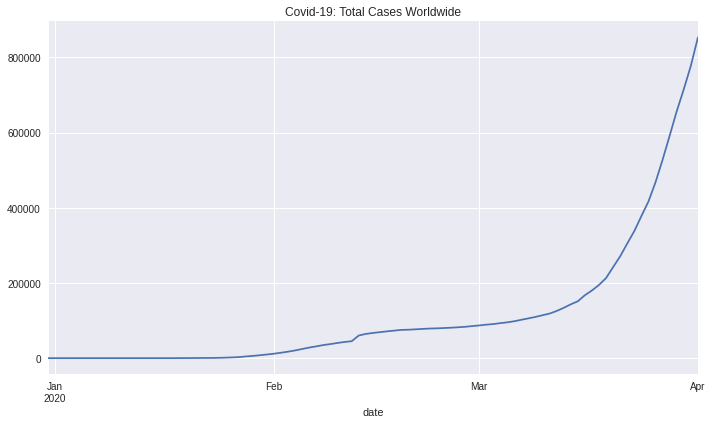

In [162]:
# plot the total cases 
fig, ax = plt.subplots(figsize=(10,6))

pv_cases_sum.Worldwide.plot(ax=ax)
ax .set_title('Covid-19: Total Cases Worldwide')

plt.savefig('total_cases.jpg')
files.download('total_cases.jpg')

plt.tight_layout()

## Total Cases by Country

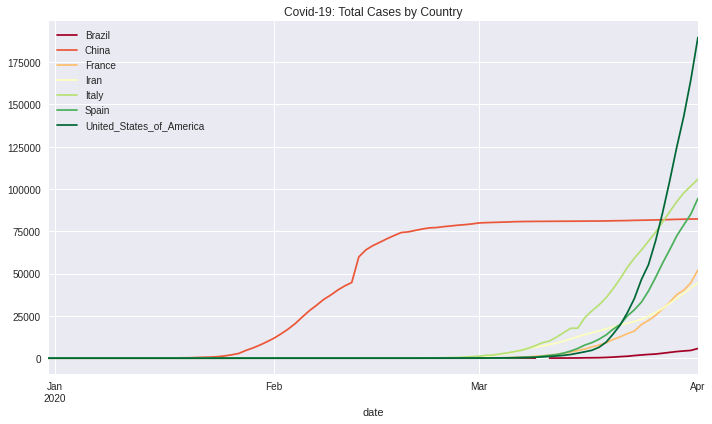

In [144]:
# plot total cases by country
fig, ax = plt.subplots(figsize=(10,6))

pv_cases_sum[['Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(ax=ax, cmap='RdYlGn')
ax.set_title('Covid-19: Total Cases by Country')

plt.savefig('total_cases_country.jpg')
files.download('total_cases_country.jpg')

plt.tight_layout()


The graphs above show that total cases presented a **clear exponential growth by mid-March**, and the detailed graph by country evidences that the **contagion in the United States** was one of the **main causes of this movement, together with Italy and Spain, that, by Mar 30th, surpassed China on the number of total cases**.

## Ranking: Total Cases by Country - Dataframe

Now, we want to know which countries register the major number of confirmed cases of Covid-19. Again, we will use a **pivot table** to find out, and use `df.sort_values()` to order the results:

In [145]:
# pivot table to calculate total cases
pv_total_cases = pd.pivot_table(df, index='countries', values='cases', aggfunc='sum').sort_values(by='cases', ascending=False)

plt.savefig('cases_table.jpg')
files.download('cases_table.jpg')

display(pv_total_cases)

,cases
countries,
United_States_of_America,189618
Italy,105792
Spain,94417
China,82295
Germany,67366
...,...
Sierra_Leone,1
Saint_Vincent_and_the_Grenadines,1
Papua_New_Guinea,1


<Figure size 576x396 with 0 Axes>

## Ranking: Total Cases by Country - Chart

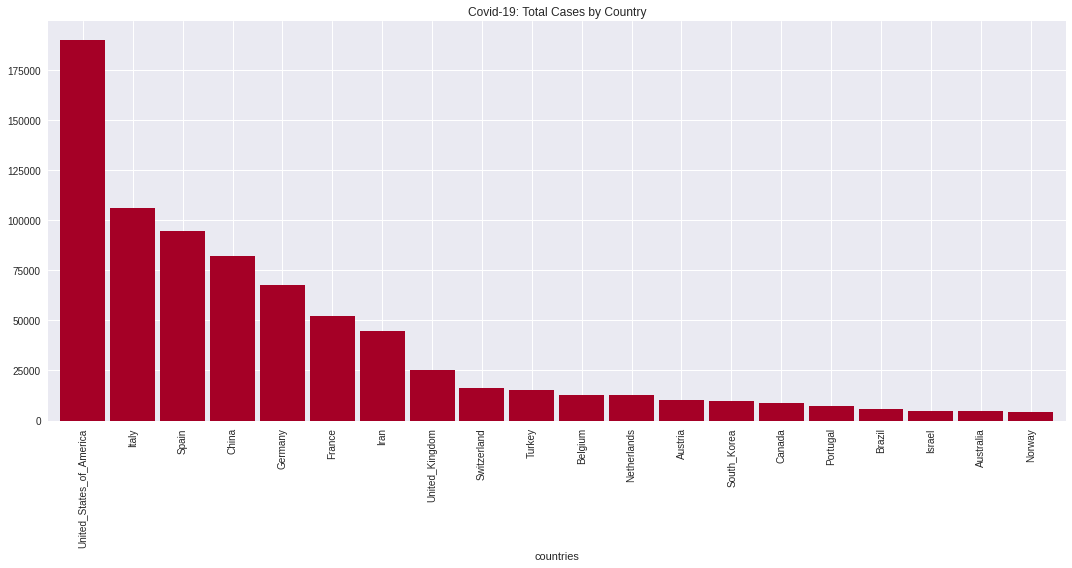

In [146]:
# plot total cases by country
fig, ax = plt.subplots(figsize=(15,8))

pv_total_cases.iloc[0:20, 0].plot(kind='bar', width=0.9, ax=ax, cmap='RdYlGn')
ax.set_title('Covid-19: Total Cases by Country')

plt.savefig('ranking_cases_country.jpg')
files.download('ranking_cases_country.jpg')

plt.tight_layout()

As we can see, the **United States** leads the ranking of total cases, followed by Italy and Spain. We can also notice that from the **20 listed countries, 10 are European**.

## ***Covid-19 Deaths***
## Daily Deceased by Country - Dataframe

Next, we will apply the same analysis for death cases. Again, we will use a **pivot table** to separate the countries in columns:

In [147]:
# creating a pivot table for daily death figures
pv_deaths = pd.pivot_table(df, index='date', values='deaths', columns='countries')
pv_deaths.tail()

countries,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,...,Senegal,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-28,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,14.0,0.0,NaN,0.0,0.0,0.0,...,0.0,3.0,0.0,NaN,0.0,0.0,0.0,4.0,0.0,0.0,5.0,NaN,769.0,0.0,0.0,0.0,26.0,36.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,411.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-29,1.0,1.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,22.0,0.0,1.0,4.0,6.0,NaN,0.0,1.0,7.0,0.0,NaN,0.0,0.0,0.0,...,0.0,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,832.0,1.0,0.0,0.0,10.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,3.0,0.0,260.0,1.0,0.0,484.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-30,1.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,3.0,1.0,NaN,22.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,...,0.0,3.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,6.0,NaN,838.0,0.0,0.0,0.0,8.0,22.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,23.0,0.0,0.0,1.0,0.0,209.0,0.0,0.0,318.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-03-31,0.0,2.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,NaN,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,3.0,2.0,NaN,23.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,28.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,5.0,0.0,812.0,0.0,1.0,0.0,36.0,38.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,2.0,3.0,180.0,0.0,NaN,661.0,0.0,1.0,2.0,0.0,0.0,0.0
2020-04-01,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,0.0,NaN,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,NaN,849.0,1.0,0.0,0.0,34.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,0.0,0.0,2.0,1.0,381.0,0.0,0.0,909.0,0.0,0.0,0.0,0.0,0.0,0.0


## Daily Deceased by Selected Countries - Chart
From the previous dataframe, we can plot the number of new deaths daily:

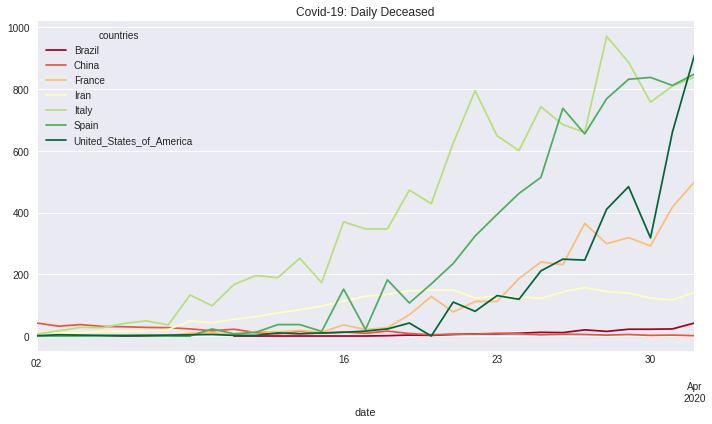

In [148]:
# plotting daily deceased graph
fig, ax = plt.subplots(figsize=(10,6))

pv_deaths.loc['2020-03-02': , ['Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(kind='line', cmap='RdYlGn', ax=ax)
ax.set_title('Covid-19: Daily Deceased')

plt.savefig('daily_deaths_country.jpg')
files.download('daily_deaths_country.jpg')

plt.tight_layout();

We can see a **steep upward trend** of death cases from mid_march on, as the number of cases also increase significantly. It is worth to notice here **the sharp increase on deaths at the US from April 30th on, and the beginning of a steeper curve for Brazil.**

## Daily Deceased Worldwide - Dataframe

Once again, the original dataset does not calculate the total deaths, so we will calculate it using `.iloc` and `sum()`:

In [149]:
# calculate total deaths daily
pv_deaths['Worldwide'] = pv_deaths.iloc[:,:].sum(axis=1)
display(pv_deaths['Worldwide'])

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-03-28    3318.0
2020-03-29    3461.0
2020-03-30    3125.0
2020-03-31    3697.0
2020-04-01    4616.0
Name: Worldwide, Length: 93, dtype: float64

## Daily Deceased Worldwide, Chart

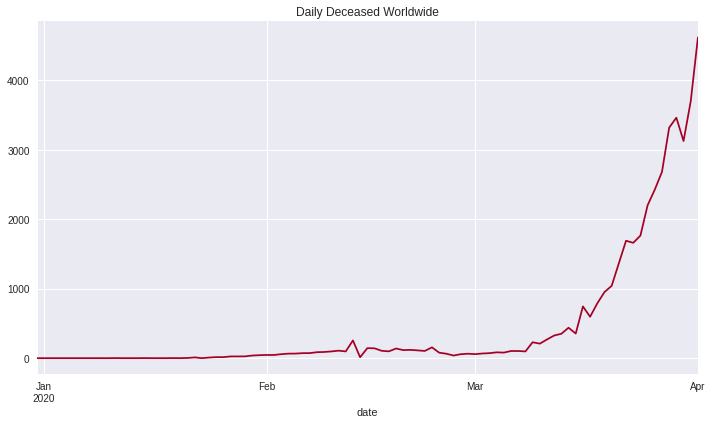

In [150]:
# plot daily deaths worldwide
fig, ax = plt.subplots(figsize=(10,6))

pv_deaths.Worldwide.plot(cmap='RdYlGn', ax=ax)
ax.set_title('Daily Deceased Worldwide')

plt.savefig('daily_total_deaths.jpg')
files.download('daily_total_deaths.jpg')

plt.tight_layout()

Like for the new confirmed cases, we can see that daily deaths **increased exponentially from mid-March on**.

## Total Deceased Worldwide

We want to check the evolution of accumulated number of deaths, and we will use the `pd.cumsum()` function to calculate it.

In [151]:
# calculate accumulated number of deaths
pv_deaths_sum = pv_deaths.cumsum(skipna=True)
pv_deaths_sum.tail()

countries,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,...,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Worldwide
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-28,2.0,9.0,21.0,3.0,0.0,0.0,0.0,17.0,1.0,0.0,13.0,68.0,3.0,0.0,4.0,5.0,0.0,0.0,289.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,92.0,0.0,0.0,3.0,3.0,NaN,0.0,1.0,53.0,1.0,NaN,1.0,0.0,0.0,...,6.0,0.0,NaN,2.0,0.0,0.0,9.0,0.0,2.0,144.0,NaN,4858.0,0.0,1.0,0.0,92.0,197.0,0.0,2.0,5.0,0.0,1.0,2.0,6.0,92.0,0.0,0.0,5.0,2.0,759.0,0.0,0.0,1707.0,0.0,0.0,1.0,0.0,0.0,1.0,26988.0
2020-03-29,3.0,10.0,26.0,4.0,0.0,0.0,0.0,19.0,3.0,0.0,14.0,68.0,4.0,0.0,4.0,5.0,0.0,0.0,353.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,114.0,0.0,1.0,7.0,9.0,NaN,0.0,2.0,60.0,1.0,NaN,1.0,0.0,0.0,...,10.0,0.0,NaN,3.0,0.0,0.0,9.0,0.0,2.0,152.0,NaN,5690.0,1.0,1.0,0.0,102.0,235.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,108.0,0.0,0.0,8.0,2.0,1019.0,1.0,0.0,2191.0,0.0,1.0,1.0,0.0,0.0,1.0,30449.0
2020-03-30,4.0,10.0,29.0,6.0,2.0,0.0,0.0,20.0,3.0,0.0,16.0,86.0,4.0,0.0,4.0,5.0,0.0,0.0,431.0,0.0,0.0,0.0,0.0,3.0,6.0,NaN,136.0,0.0,1.0,8.0,9.0,NaN,0.0,2.0,61.0,1.0,NaN,1.0,0.0,0.0,...,13.0,0.0,NaN,3.0,0.0,0.0,11.0,0.0,2.0,158.0,NaN,6528.0,1.0,1.0,0.0,110.0,257.0,1.0,5.0,7.0,0.0,1.0,3.0,8.0,131.0,0.0,0.0,9.0,2.0,1228.0,1.0,0.0,2509.0,1.0,1.0,1.0,0.0,0.0,1.0,33574.0
2020-03-31,4.0,12.0,31.0,8.0,2.0,0.0,0.0,24.0,3.0,NaN,19.0,108.0,4.0,0.0,4.0,5.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,6.0,8.0,NaN,159.0,0.0,1.0,8.0,12.0,NaN,0.0,2.0,89.0,1.0,NaN,1.0,0.0,0.0,...,13.0,0.0,NaN,3.0,NaN,0.0,11.0,0.0,3.0,163.0,0.0,7340.0,1.0,2.0,0.0,146.0,295.0,2.0,5.0,10.0,0.0,1.0,3.0,8.0,168.0,0.0,0.0,11.0,5.0,1408.0,1.0,NaN,3170.0,1.0,2.0,3.0,0.0,0.0,1.0,37271.0
2020-04-01,4.0,15.0,35.0,12.0,2.0,0.0,0.0,24.0,3.0,0.0,20.0,128.0,5.0,0.0,4.0,5.0,0.0,0.0,705.0,0.0,0.0,0.0,0.0,7.0,12.0,0.0,201.0,0.0,1.0,8.0,12.0,0.0,0.0,8.0,96.0,1.0,NaN,1.0,0.0,0.0,...,23.0,0.0,0.0,3.0,0.0,0.0,13.0,0.0,5.0,163.0,NaN,8189.0,2.0,2.0,0.0,180.0,373.0,2.0,5.0,10.0,0.0,1.0,3.0,9.0,214.0,0.0,0.0,13.0,6.0,1789.0,1.0,0.0,4079.0,1.0,2.0,3.0,0.0,0.0,1.0,41887.0


In [152]:
sum_deaths = pv_deaths_sum.loc['2020-04-01','Worldwide']
print("Until April 1st, there were {} deaths.".format(sum_deaths))

Until April 1st, there were 41887.0 deaths.


## Total Deceased Worldwide - Chart

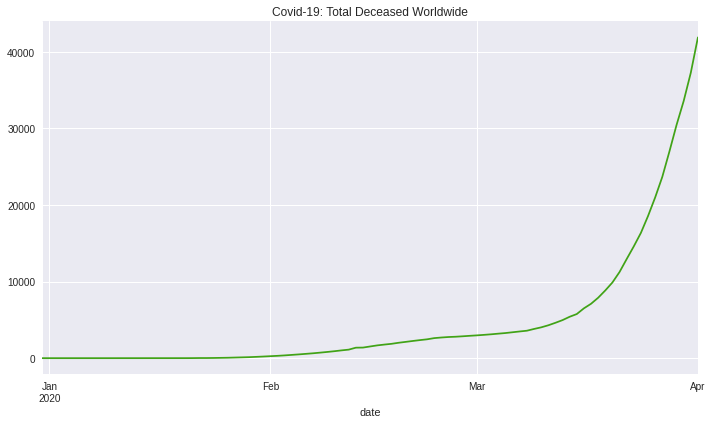

In [153]:
# plot the chart for total deaths worldwide
fig, ax = plt.subplots(figsize=(10,6))

pv_deaths_sum.Worldwide.plot(color='#41A317', ax=ax)
ax.set_title('Covid-19: Total Deceased Worldwide')

plt.savefig('total_deaths.jpg')
files.download('total_deaths.jpg')

plt.tight_layout()

## Total Deceased by Country

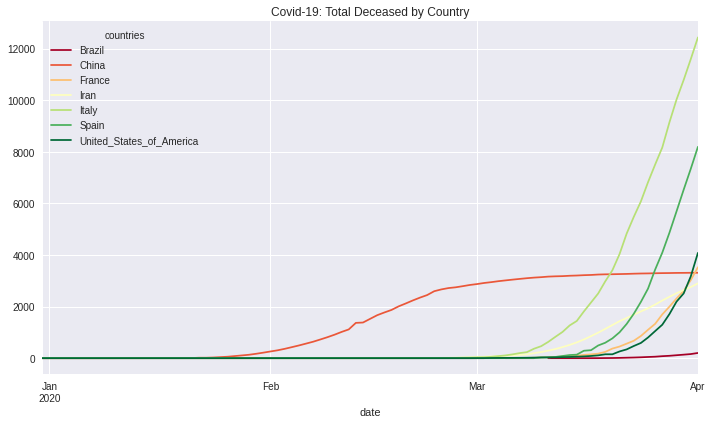

In [154]:
fig, ax = plt.subplots(figsize=(10,6))

pv_deaths_sum[['Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(cmap='RdYlGn', ax=ax)
ax.set_title('Covid-19: Total Deceased by Country')

plt.savefig('total_deaths_country.jpg')
files.download('total_deaths_country.jpg')

plt.tight_layout()


Also for the deaths, despite of the recent efforts to reduce the mortality, **the most affected countries like Italy, Spain and recently the United States have higher death rates than in China**.

## Ranking: Total Deceased by Country - Dataframe

In [155]:
# creating a pivot table to calculate total deaths by country
pv_total_deaths = pd.pivot_table(df, values='deaths', index='countries', aggfunc=sum).sort_values(by='deaths', ascending=False)
plt.savefig('death_table.jpg')
files.download('death_table.jpg')
display(pv_total_deaths)

,deaths
countries,
Italy,12430
Spain,8189
United_States_of_America,4079
France,3523
China,3310
...,...
Papua_New_Guinea,0
Latvia,0
Faroe_Islands,0


<Figure size 576x396 with 0 Axes>

## Ranking: Total Deceased by Country - Chart

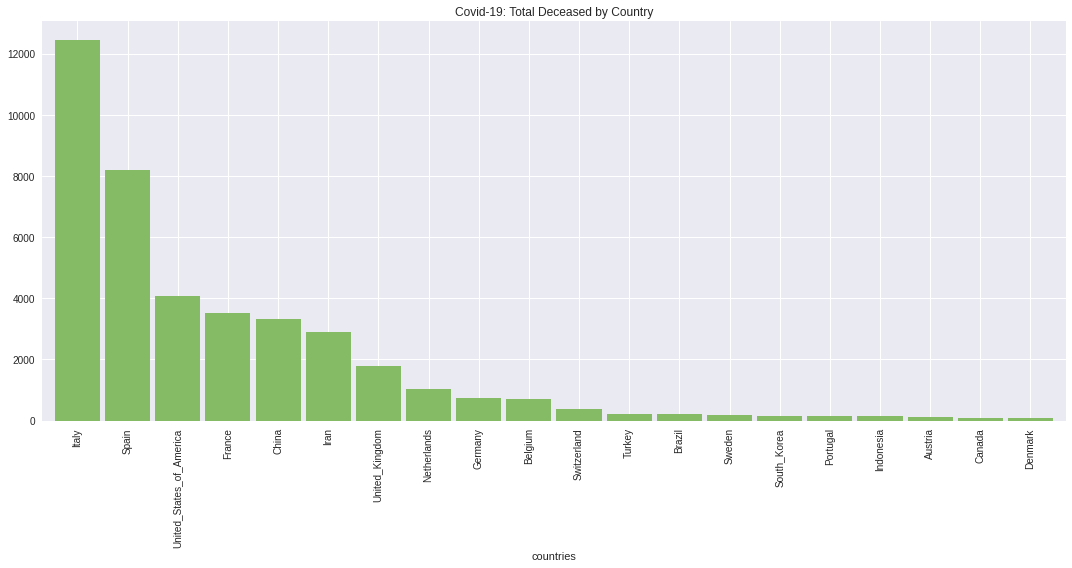

In [156]:
fig, ax = plt.subplots(figsize=(15,8))

pv_total_deaths.iloc[0:20, 0].plot(x='countries', y='deaths', kind='bar', color='#85BB65',
                                   width=0.9, ax=ax)

ax.set_title('Covid-19: Total Deceased by Country')

plt.savefig('ranking_countries.jpg')
files.download('ranking_countries.jpg')


plt.tight_layout()

## Mortality Rate

Now, we create a new dataframe to calculate the mortality rate by country. We are using accumulated data.

In [157]:
# calculate mortality rate 
df_mort = (pv_deaths_sum/pv_cases_sum)*100
df_mort.tail()

countries,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,...,Serbia,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Worldwide
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-28,2.197802,4.838710,6.885246,1.123596,0.000000,0.0,0.0,2.463768,0.268817,0.0,0.384843,0.883461,1.818182,0.0,0.858369,10.416667,0.0,0.0,3.967600,0.0,0.0,0.0,0.0,0.000000,1.310044,NaN,2.692420,0.0,0.000000,1.023891,2.054795,NaN,0.0,1.136364,1.130305,20.000000,NaN,12.500000,0.0,0.0,...,1.312910,0.0,NaN,0.273224,0.0,0.0,1.424051,0.0,0.170940,1.519308,NaN,7.583634,0.000000,33.333333,0.0,3.020355,1.627561,0.000000,0.749064,0.440141,0.0,4.000000,3.030303,2.643172,1.614602,0.0,0.0,2.293578,0.493827,5.219006,0.000000,0.0,1.630591,0.000000,0.000000,0.840336,0.0,0.0,20.000000,4.561064
2020-03-29,2.830189,5.076142,6.356968,1.298701,0.000000,0.0,0.0,2.550336,0.707547,0.0,0.367551,0.820166,2.197802,0.0,0.845666,10.416667,0.0,0.0,3.864681,0.0,0.0,0.0,0.0,0.000000,1.945525,NaN,2.920082,0.0,0.833333,2.114804,5.000000,NaN,0.0,2.020202,1.113999,20.000000,NaN,12.500000,0.0,0.0,...,1.517451,0.0,NaN,0.373599,0.0,0.0,1.302460,0.0,0.168492,1.586142,NaN,7.875651,0.869565,20.000000,0.0,2.959095,1.786800,0.000000,0.706714,0.481928,0.0,3.571429,2.702703,2.643172,1.459065,0.0,0.0,2.572347,0.427350,5.962900,7.692308,0.0,1.757510,0.000000,0.751880,0.840336,0.0,0.0,14.285714,4.635496
2020-03-30,3.508772,4.716981,6.387665,1.796407,28.571429,0.0,0.0,2.439024,0.707547,0.0,0.390911,0.975831,1.913876,0.0,0.800000,10.204082,0.0,0.0,3.977482,0.0,0.0,0.0,0.0,3.125000,1.857585,NaN,3.195489,0.0,0.793651,2.312139,5.000000,NaN,0.0,2.020202,0.975220,20.000000,NaN,12.500000,0.0,0.0,...,1.754386,0.0,NaN,0.355450,0.0,0.0,1.506849,0.0,0.156250,1.635441,NaN,8.284579,0.833333,20.000000,0.0,2.972973,1.800476,11.111111,1.633987,0.504323,0.0,3.333333,3.846154,2.877698,1.421287,0.0,0.0,2.153110,0.427350,6.290339,7.142857,0.0,1.754239,0.323625,0.689655,0.840336,0.0,0.0,14.285714,4.693347
2020-03-31,2.836879,5.381166,6.066536,2.162162,28.571429,0.0,0.0,2.484472,0.622407,NaN,0.416941,1.122895,1.465201,0.0,0.776699,10.204082,0.0,0.0,4.311287,0.0,0.0,0.0,0.0,5.607477,2.266289,NaN,3.472374,0.0,0.787402,2.228412,5.405405,NaN,0.0,1.408451,1.198815,20.000000,NaN,8.333333,0.0,0.0,...,1.754386,0.0,NaN,0.355450,NaN,0.0,1.441678,0.0,0.226244,1.665645,0.0,8.615529,0.833333,33.333333,0.0,3.624628,1.914093,20.000000,1.633987,0.605694,0.0,2.941176,3.529412,2.564103,1.456437,0.0,0.0,2.291667,0.818331,6.359243,5.263158,NaN,1.925647,0.312500,1.342282,2.222222,0.0,0.0,14.285714,4.791867
2020-04-01,2.409639,6.172840,5.993151,3.191489,28.571429,0.0,0.0,2.484472,0.563910,0.0,0.424899,1.257120,1.677852,0.0,0.705467,9.803922,0.0,0.0,5.518591,0.0,0.0,0.0,0.0,6.086957,2.905569,0.0,3.515830,0.0,0.775194,2.005013,4.878049,0.0,0.0,4.145078,1.124649,16.666667,NaN,7.142857,0.0,0.0,...,2.555556,0.0,0.0,0.341297,0.0,0.0,1.597052,0.0,0.369549,1.665645,NaN,8.673226,1.639344,28.571429,0.0,4.058625,2.315620,20.000000,1.552795,0.605694,0.0,2.941176,3.448276,2.486188,1.387628,0.0,0.0,2.367942,0.903614,7.113320,5.263158,0.0,2.151167,0.295858,1.156069,2.222222,0.0,0.0,12.500000,4.909400


## Total Mortality Rate - Graph

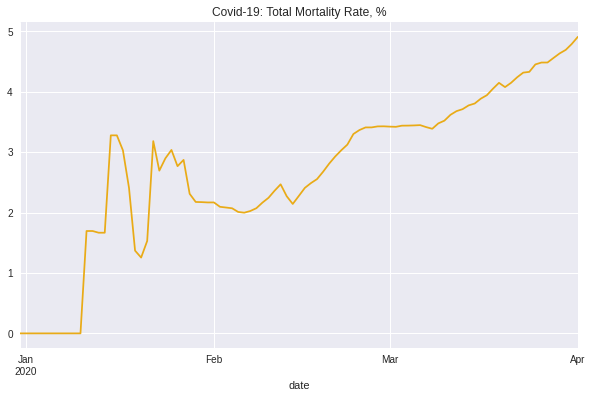

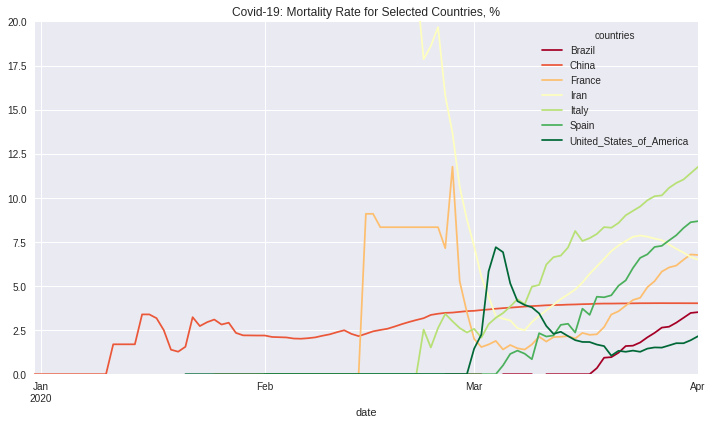

In [158]:
# plot mortality rate graph
fig, ax = plt.subplots(figsize=(10,6))

df_mort.Worldwide.plot(color='#E9AB17', ax=ax)
ax.set_title('Covid-19: Total Mortality Rate, %')

plt.savefig('total_mort.jpg')
files.download('total_mort.jpg')

fig, ax = plt.subplots(figsize=(10,6))
df_mort.loc['2019-12-31':'2020-04-01', ['Brazil', 'China', 'France', 'Iran', 'Italy','Spain', 
            'United_States_of_America']].plot(cmap='RdYlGn', ax=ax)
ax.set_title('Covid-19: Mortality Rate for Selected Countries, %')
ax.set_ylim(ymin=0, ymax=20)

plt.savefig('total_mort_country.jpg')
files.download('total_mort_country.jpg')

plt.tight_layout()

**World Mortality Rate** continues to increase **across the countries**, as the Covid-19 spreads and infects more people. It is worth noticing that **China was, so far, the only country to stabilize this rate.**